In [1]:
# TsundereChen, 2020
# Import libraries first...
import os
import random
import pickle

from mlgame.communication import ml as comm

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import DenseFeatures
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
import matplotlib.pyplot as plt

In [2]:
# Create needed variables
pickleDir = "/MLgame/log"

Frame = []
Ball_X = []
Ball_Y = []
Ball_speed_X = []
Ball_speed_Y = []
Platform_1P_X = []
Platform_2P_X = []
Blocker_X = []
Command_1P = []
Command_2P = []
Command_1P_LEFT = []
Command_1P_NONE = []
Command_1P_RIGHT= []
Command_2P_LEFT = []
Command_2P_NONE = []
Command_2P_RIGHT= []

selectedFeatures = ["Ball_X",
             "Ball_Y",
             "Ball_speed_X",
             "Ball_speed_Y",
             "Platform_1P_X",
             "Blocker_X"]
selectedTargets = ["Command_1P"]

In [3]:
def movement(command):
    if command == "MOVE_LEFT":
        return 0
    elif command == "MOVE_RIGHT":
        return 2
    else: return 1

In [4]:
def readPickle(filename):
    frame = []
    ball_x = []
    ball_y = []
    ball_speed_x = []
    ball_speed_y = []
    platform_1P_x = []
    platform_2P_x = []
    blocker_x = []
    command_1P = []
    command_2P = []
    gameLog = pickle.load((open(filename, 'rb')))
    for sceneInfo in gameLog:
        frame.append(sceneInfo['frame'])
        ball_x.append(sceneInfo['ball'][0])
        ball_y.append(sceneInfo['ball'][1])
        ball_speed_x.append(sceneInfo['ball_speed'][0])
        ball_speed_y.append(sceneInfo['ball_speed'][1])
        platform_1P_x.append(sceneInfo['platform_1P'][0])
        platform_2P_x.append(sceneInfo['platform_2P'][0])
        blocker_x.append(sceneInfo['blocker'][0])
        command_1P.append(movement(sceneInfo['command_1P']))
        command_2P.append(movement(sceneInfo['command_2P']))
    return frame, \
           ball_x, \
           ball_y, \
           ball_speed_x, \
           ball_speed_y, \
           platform_1P_x, \
           platform_2P_x, \
           blocker_x, \
           command_1P, \
           command_2P

In [5]:
def readCommandPickle(filename):
    command_1P_LEFT = []
    command_1P_NONE = []
    command_1P_RIGHT= []
    command_2P_LEFT = []
    command_2P_NONE = []
    command_2P_RIGHT= []
    gameLog = pickle.load((open(filename, 'rb')))
    for sceneInfo in gameLog:
        if movement(sceneInfo['command_1P']) == 0:
            command_1P_LEFT.append(1)
            command_1P_NONE.append(0)
            command_1P_RIGHT.append(0)
        elif movement(sceneInfo['command_1P']) ==  1:
            command_1P_LEFT.append(0)
            command_1P_NONE.append(1)
            command_1P_RIGHT.append(0)
        elif movement(sceneInfo['command_1P']) ==  2:
            command_1P_LEFT.append(0)
            command_1P_NONE.append(0)
            command_1P_RIGHT.append(1)
        if movement(sceneInfo['command_2P']) == 0:
            command_2P_LEFT.append(1)
            command_2P_NONE.append(0)
            command_2P_RIGHT.append(0)
        elif movement(sceneInfo['command_2P']) == 1:
            command_2P_LEFT.append(0)
            command_2P_NONE.append(1)
            command_2P_RIGHT.append(0)
        elif movement(sceneInfo['command_2P']) == 2:
            command_2P_LEFT.append(0)
            command_2P_NONE.append(0)
            command_2P_RIGHT.append(1)
    return command_1P_LEFT, \
           command_1P_NONE, \
           command_1P_RIGHT, \
           command_2P_LEFT, \
           command_2P_NONE, \
           command_2P_RIGHT

In [6]:
def fileList(path):
    return os.listdir(path)

In [7]:
def importData():
    print("Importing...")
    global Frame
    global Ball_X
    global Ball_Y
    global Ball_speed_X
    global Ball_speed_Y
    global Platform_1P_X
    global Platform_2P_X
    global Blocker_X
    global Command_1P
    global Command_2P
    global Command_1P_LEFT
    global Command_1P_NONE
    global Command_1P_RIGHT
    global Command_2P_LEFT
    global Command_2P_NONE
    global Command_2P_RIGHT

    path = os.path.dirname(os.path.abspath(''))
    path = path + pickleDir
    files = fileList(path)
    for filename in files:
        fullpath = path + "/" + filename
        frame, ball_x, ball_y, ball_speed_x, ball_speed_y, platform_1P_x, platform_2P_x, blocker_x, command_1P, command_2P = readPickle(fullpath)
        command_1P_LEFT, command_1P_NONE, command_1P_RIGHT, command_2P_LEFT, command_2P_NONE, command_2P_RIGHT = readCommandPickle(fullpath)
        Frame += frame[0:600]
        Ball_X += ball_x[0:600]
        Ball_Y += ball_y[0:600]
        Ball_speed_X += ball_speed_x[0:600]
        Ball_speed_Y += ball_speed_y[0:600]
        Platform_1P_X += platform_1P_x[0:600]
        Platform_2P_X += platform_2P_x[0:600]
        Blocker_X += blocker_x[0:600]
        Command_1P += command_1P[0:600]
        Command_2P += command_2P[0:600]
        Command_1P_LEFT += command_1P_LEFT[0:600]
        Command_1P_NONE += command_1P_NONE[0:600]
        Command_1P_RIGHT += command_1P_RIGHT[0:600]
        Command_2P_LEFT += command_2P_LEFT[0:600]
        Command_2P_NONE += command_2P_NONE[0:600]
        Command_2P_RIGHT += command_2P_RIGHT[0:600]
    originalData = pd.DataFrame({'Frame':Frame,
        'Ball_X': Ball_X, 'Ball_Y': Ball_Y, 'Ball_speed_X': Ball_speed_X, 'Ball_speed_Y': Ball_speed_Y,
        'Platform_1P_X': Platform_1P_X, 'Platform_2P_X': Platform_2P_X, 'Blocker_X': Blocker_X,
        'Command_1P': Command_1P, 'Command_2P': Command_2P,
        'Command_1P_LEFT': Command_1P_LEFT, 'Command_1P_NONE': Command_1P_NONE, 'Command_1P_RIGHT': Command_1P_RIGHT,
        'Command_2P_LEFT': Command_2P_LEFT, 'Command_2P_NONE': Command_2P_NONE, 'Command_2P_RIGHT': Command_2P_RIGHT})
    print("Import done\n")
    originalData = originalData.reindex(np.random.permutation(originalData.index))
    trainingData = originalData
    validateData = originalData.tail(2000)
    return trainingData, validateData

In [8]:
def dataSummary(trainingData, validateData):
    print("Training samples summary:")
    print(trainingData.describe())
    print("Test samples summary:")
    print(validateData.describe())

In [9]:
def featureSelection(trainingData, validateData):
    trainingFeatures = trainingData[selectedFeatures]
    validateFeatures = validateData[selectedFeatures]
    return trainingFeatures, validateFeatures

In [10]:
def targetSelection(trainingData, validateData):
    trainingTargets = trainingData[selectedTargets]
    validateTargets = validateData[selectedTargets]
    return trainingTargets, validateTargets

In [11]:
def createFeatureColumns(inputFeatures):
    return set([tf.feature_column.numeric_column(my_feature) for my_feature in inputFeatures])

In [12]:
def createModel(learningRate):
    model = Sequential()
    model.add(Dense(units = 6, activation=None))
    # Hidden layers
    model.add(Dense(units = 24, activation='relu'))
    model.add(Dense(units = 24, activation='relu'))
    model.add(Dropout(rate=0.2))
    # Output layer
    model.add(Dense(units=3, activation='softmax'))
    model.compile(optimizer=Adam(lr=learningRate), loss='sparse_categorical_crossentropy',metrics=['accuracy'])
    return model


In [13]:
def trainModel(model, feature, label, epochs, batchSize=None):
    # features = {name:np.array(value) for name, value in feature.items()}
    # labels = {name:np.array(value) for name, value in label.items()}
    history = model.fit(x = feature, y = label, batch_size = batchSize, epochs = epochs, shuffle = True)
    epochs = history.epoch

    hist = pd.DataFrame(history.history)
    accuracy = hist["accuracy"]
    return epochs, accuracy

In [14]:
def evaluateModel(model, feature, label, batchSize = None):
    # features = {name:np.array(value) for name, value in feature.items()}
    return model.evaluate(x = feature, y = label, batch_size = batchSize)

In [15]:
def plotLossCurve(epochs, accuracy):
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.plot(epochs, accuracy, label="Accuracy")
    plt.legend()
    plt.ylim([accuracy.min()*0.95, accuracy.max()*1.03])
    plt.show()

In [16]:
trainingData, validateData = importData()
# Select features
trainingFeatures, validateFeatures = featureSelection(trainingData, validateData)
# Select targets
trainingTargets, validateTargets   = targetSelection(trainingData, validateData)

Importing...
117670
117670
Import done



Epoch 1/160
118/118 [==============================] - 0s 2ms/step - loss: 0.8233 - accuracy: 0.7233
Epoch 2/160
118/118 [==============================] - 0s 2ms/step - loss: 0.4018 - accuracy: 0.8448
Epoch 3/160
118/118 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8723
Epoch 4/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2896 - accuracy: 0.8843
Epoch 5/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2690 - accuracy: 0.8913
Epoch 6/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2514 - accuracy: 0.8980
Epoch 7/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2395 - accuracy: 0.9025
Epoch 8/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2301 - accuracy: 0.9061
Epoch 9/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2131 - accuracy: 0.9131
Epoch 10/160
118/118 [==============================] - 0s 2ms/step - loss: 0.2129 - accura

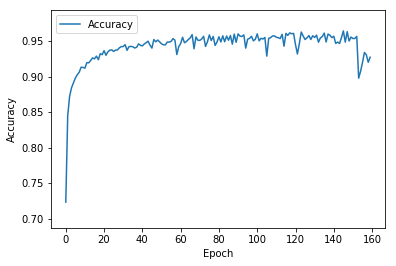


Evaluate the new model against validation set:
2/2 [==============================] - 0s 1ms/step - loss: 0.2172 - accuracy: 0.9290

Loss: 0.21717728674411774
Accuracy: 0.9290000200271606


In [17]:
learningRate = 0.01
epochs = 160
batchSize = 1000
model = createModel(learningRate)
epochs, accuracy = trainModel(model, trainingFeatures, trainingTargets, epochs, batchSize)
print(model.summary())

plotLossCurve(epochs, accuracy)

print("\nEvaluate the new model against validation set:")
loss, acc = evaluateModel(model, validateFeatures, validateTargets, batchSize)
print("\nLoss: {}\nAccuracy: {}".format(loss, acc))

In [18]:
print("Exporting model...")
model.save('saved_model/myModel')

Exporting model...


W0513 17:42:39.421788 140033019799296 deprecation.py:506] From /opt/conda/lib/python3.6/site-packages/tensorflow/python/ops/resource_variable_ops.py:1817: calling BaseResourceVariable.__init__ (from tensorflow.python.ops.resource_variable_ops) with constraint is deprecated and will be removed in a future version.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
